In [20]:
import os
os.makedirs("reports/figures", exist_ok=True)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# path to your exported file (you already created this)
csv_path = r"C:\temp\returns.csv"   # <-- change to normalized.csv if you're plotting that

df = pd.read_csv(csv_path, header=None)



In [22]:
# Assign column names based on your file format:
# returns.csv rows look like: STOCKS_ALL,1962-01-02,-0.902...
df.columns = ["symbol", "date", "return"]

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["return"] = pd.to_numeric(df["return"], errors="coerce")
df = df.dropna(subset=["date", "return"])
df = df.sort_values("date")
df.head()

,symbol,date,return
0,STOCKS_ALL,1962-01-02,9.220610
1,STOCKS_ALL,1962-01-03,-0.902158
2,STOCKS_ALL,1962-01-03,9.314949
3,STOCKS_ALL,1962-01-04,-0.904288
4,STOCKS_ALL,1962-01-04,9.338942


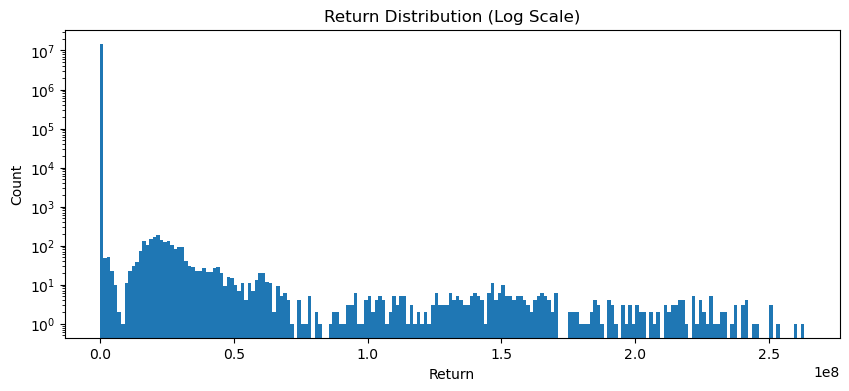

In [23]:
plt.figure(figsize=(10,4))
plt.hist(df["return"], bins=200, log=True)
plt.title("Return Distribution (Log Scale)")
plt.xlabel("Return")
plt.ylabel("Count")
plt.show()


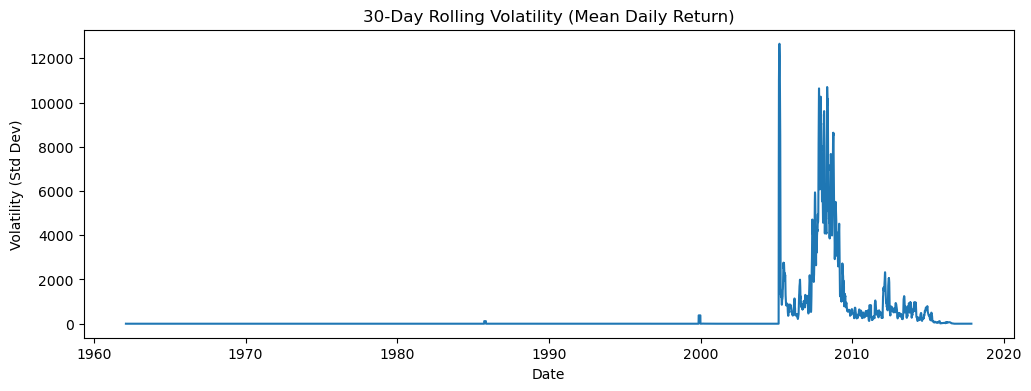

In [24]:
daily_mean = df.groupby("date")["return"].mean().sort_index()
vol_30d = daily_mean.rolling(30).std()

plt.figure(figsize=(12,4))
plt.plot(vol_30d.index, vol_30d.values)
plt.title("30-Day Rolling Volatility (Mean Daily Return)")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev)")
plt.show()


In [25]:
import os
os.makedirs("reports/figures", exist_ok=True)


In [26]:
os.makedirs(r"reports\figures", exist_ok=True)
plt.savefig(r"reports\figures\volatility_30d.png", dpi=200, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>